# Grammaticality and semantic analysis

This notebook shows the analysis of grammaticality and semantic analysis based on the method built by Hie et al.

## Set up the analysis

### Import the python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import scipy.stats as ss
from adjustText import adjust_text

### Read in datas

To assess the antigenic property of the synthetic variants in silico, we applied the viral language model developed by Hie at el. The repository can be found here: https://github.com/brianhie/viral-mutation. You c the results used in this notebook by following their instructions.

In [2]:
df=pd.read_excel('../data/supp_3.xlsx',index_col=0)

In [3]:
df.head()

,Semantic change,Grammaticality,Sequence,group
0,3.094232,-4.789749,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Synthetic
1,2.134395,-5.533757,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Synthetic
2,2.550021,-6.745277,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Synthetic
3,2.158475,-6.075179,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Synthetic
4,2.081398,-5.193011,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Synthetic


In [4]:
VOC=pd.read_csv('../data/sars-cov-2_variants_update.csv',index_col=0)

In [5]:
spike_wt=""
with open('../data/example_wt.fa','r') as f:
    for line in f.readlines():
        if line.startswith(">") == False:
            spike_wt=spike_wt+line.strip("\n")

In [6]:
def contrust_spike(mt_RBD,spike_seq):
    return spike_seq[0:330]+mt_RBD+spike_seq[531:]

In [7]:
VOC_df=df[df.Sequence.isin([contrust_spike(s,spike_wt) for s in VOC.seq]
)]
VOC_df=VOC_df.reset_index(drop=True)
VOC_df["name"]=["wt","B.1.1.7","B.1.617.2","B.1.351","P.1","B.1.1.529","BA.2"]
VOC_df

,Semantic change,Grammaticality,Sequence,group,name
0,0.000000,0.000000,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,wt
1,0.731646,-3.632995,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,B.1.1.7
2,1.006948,-4.134391,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,B.1.617.2
3,1.321469,-4.039905,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,B.1.351
4,1.215532,-4.208983,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,P.1
5,2.637776,-4.447969,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,B.1.1.529
6,2.611734,-4.611283,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Existing,BA.2


## Synthetic vs Gisaid

In [8]:
df_existing=df[df.group.isin(["Existing","Synthetic"])]

In [9]:
sns.set(rc={'figure.figsize':(5.5,5.5)})
sns.set_theme(style="white")

18

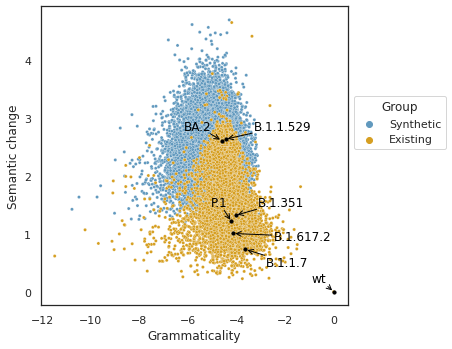

In [10]:
plt.rcParams.update({'figure.autolayout': False})
fig, ax = plt.subplots(figsize=(5.5,5.5))
sns.scatterplot(x="Grammaticality",y="Semantic change",data=df_existing,hue="group",palette=["#6199be","#d69f21"],s=10)
plt.legend(bbox_to_anchor=(1.02, 0.7), loc='upper left', borderaxespad=0,title="Group")
ax.scatter(x=VOC_df["Grammaticality"],y=VOC_df["Semantic change"],color="black",s=10)
TEXTS = []
for i in range(len(VOC_df)):
    x = VOC_df["Grammaticality"].iloc[i]
    y = VOC_df["Semantic change"].iloc[i]
    text = VOC_df["name"][i]
    TEXTS.append(ax.text(x, y, text, color="black", fontsize=12))

adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color="black", 
        lw=1
    ),
    ax=fig.axes[0]
)
#p.scatter(x=BA2["Grammaticality"],y=BA2["Semantic change"],color="green")
#plt.savefig('figures/covid/viral_language.png',dpi=500,bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Synthetic v.s. Existing: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=1.773e+02


(<AxesSubplot:xlabel='group', ylabel='Semantic change'>,
 [<statannot.StatResult.StatResult at 0x7f529f6f6940>])

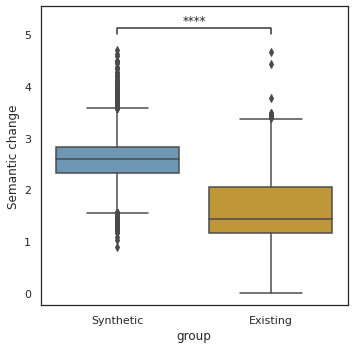

In [11]:
from statannot import add_stat_annotation
ax=sns.boxplot(x="group",y="Semantic change",data=df_existing,palette=["#6199be","#d69f21"])
add_stat_annotation(ax, data=df, x="group", y="Semantic change",
                    box_pairs=[("Existing","Synthetic")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)
#plt.savefig('figures/covid/semantic_boxplot.png',dpi=500,bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Synthetic v.s. Existing: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-6.201e+01


(<AxesSubplot:xlabel='group', ylabel='Grammaticality'>,
 [<statannot.StatResult.StatResult at 0x7f529efbeaf0>])

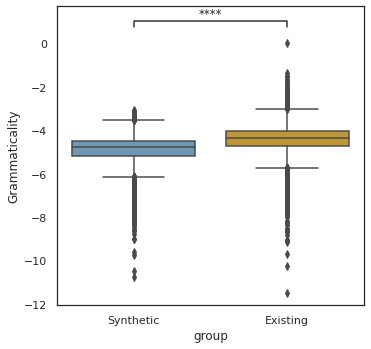

In [12]:
ax=sns.boxplot(x="group",y="Grammaticality",data=df_existing,palette=["#6199be","#d69f21"])
add_stat_annotation(ax, data=df, x="group", y="Grammaticality",
                    box_pairs=[("Existing","Synthetic")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)
#plt.savefig('figures/covid/Grammaticality_boxplot.png',dpi=500,bbox_inches="tight")

## Sythetic vs initial sequences

In [15]:
df_init=df[df.group.isin(["Synthetic","initial for synthetic"])]

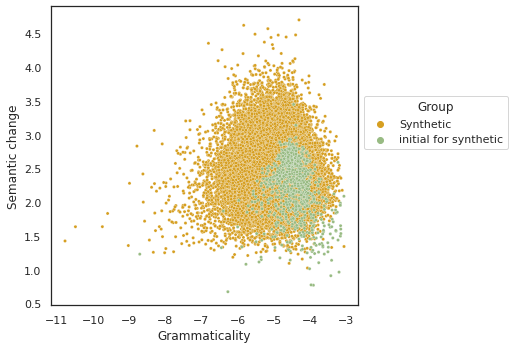

In [16]:
plt.rcParams.update({'figure.autolayout': False})
fig, ax = plt.subplots(figsize=(5.5,5.5))
sns.scatterplot(x="Grammaticality",y="Semantic change",data=df_init,hue="group",palette=["#d69f21","#98bb83"],s=10)
plt.legend(bbox_to_anchor=(1.02, 0.7), loc='upper left', borderaxespad=0,title="Group")
#plt.savefig('figures/covid/viral_language_init.png',dpi=500,bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Synthetic v.s. Existing: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=1.773e+02


(<AxesSubplot:xlabel='group', ylabel='Semantic change'>,
 [<statannot.StatResult.StatResult at 0x7f529fba6d60>])

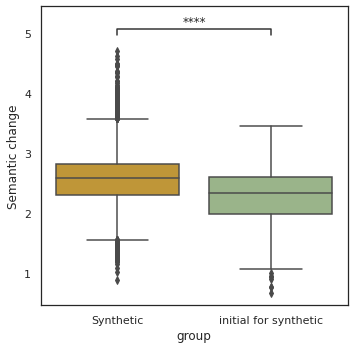

In [17]:
ax=sns.boxplot(x="group",y="Semantic change",data=df_init,palette=["#d69f21","#98bb83"])
add_stat_annotation(ax, data=df, x="group", y="Semantic change",
                    box_pairs=[("Existing","Synthetic")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)
#plt.savefig('figures/covid/semantic_boxplot_init.png',dpi=500,bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Synthetic v.s. Existing: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=1.773e+02


(<AxesSubplot:xlabel='group', ylabel='Grammaticality'>,
 [<statannot.StatResult.StatResult at 0x7f529ee73eb0>])

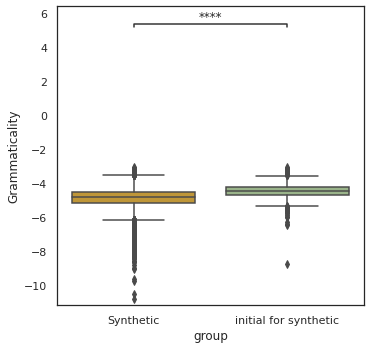

In [18]:
ax=sns.boxplot(x="group",y="Grammaticality",data=df_init,palette=["#d69f21","#98bb83"])
add_stat_annotation(ax, data=df, x="group", y="Semantic change",
                    box_pairs=[("Existing","Synthetic")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)
#plt.savefig('figures/covid/Grammaticality_boxplot_init.png',dpi=500,bbox_inches="tight")